In [46]:
import json

import numpy as np

In [47]:
dataset = json.load(open('/mnt/home2/SU2/recipe_dataset/full_format_recipes.json'))
dataset[1]["ingredients"]

['1 1/2 cups whipping cream',
 '2 medium onions, chopped',
 '5 teaspoons salt',
 '3 bay leaves',
 '3 whole cloves',
 '1 large garlic clove, crushed',
 '1 teaspoon pepper',
 '1/8 teaspoon ground nutmeg',
 'Pinch of dried thyme, crumbled',
 '8 large shallots, minced',
 '1 tablespoon butter',
 '1 pound trimmed boneless center pork loin, sinew removed cut into 1-inch chunks, well chilled',
 '3 eggs',
 '6 tablespoon all purpose flour',
 '1/4 cup tawny Port',
 '3 tablespoons dried currants, minced',
 'Lettuce leaves',
 'Cracked peppercorns',
 'Minced fresh parsley',
 'Bay leaves',
 'French bread baguette slices',
 '3 tablespoons olive oil',
 '2 large red onions, halved, sliced',
 '3 tablespoons dried currants',
 '3 tablespoons red wine vinegar',
 '1 tablespoons canned chicken broth',
 '2 teaspoons chopped fresh thyme or 3/4 teaspoon dried, crumbled',
 '1/2 teaspoon sugar']

In [48]:
import yaml
with open('common_ingredients.yaml', 'r') as file:
    common_ingredients = yaml.safe_load(file)


In [44]:
ingredients_count = []
j = 0
for i in range(len(dataset)):
    if dataset[i] == {}:
        continue
    if len(dataset[i]['ingredients']) == 10:
        print(dataset[i])
        print()
        j += 1 
    ingredients_count.append(len(dataset[i]['ingredients']))

{'directions': ['Heat oil in heavy large skillet over medium-high heat. Add onion; sauté until translucent and beginning to brown, about 4 minutes. Add wine and anchovy paste. Boil until reduced to 3/4 cup, about 3 minutes. Add tomatoes with juice; bring to boil.', 'Sprinkle fish with salt and pepper. Add fish to skillet atop tomato mixture. Reduce heat to low, cover, and simmer until fish is cooked through, about 9 minutes. Using slotted metal spatula, transfer fish to plate and tent with foil to keep warm. Mix olives, 2 teaspoons oregano, and orange peel into sauce in skillet. Increase heat to high and boil until sauce is reduced and thickened, about 6 minutes. Season to taste with salt and pepper. Place 1 fish fillet on each of 4 plates. Pour sauce over and around fish, sprinkle with remaining 1 teaspoon oregano, and serve with warm toasted bread.'], 'fat': None, 'date': '2009-03-27T04:00:00.000Z', 'categories': ['Fish', 'Olive', 'Tomato', 'Sauté', 'Low Fat', 'Low Cal', 'High Fiber'

In [27]:
j

340

<Axes: ylabel='Count'>

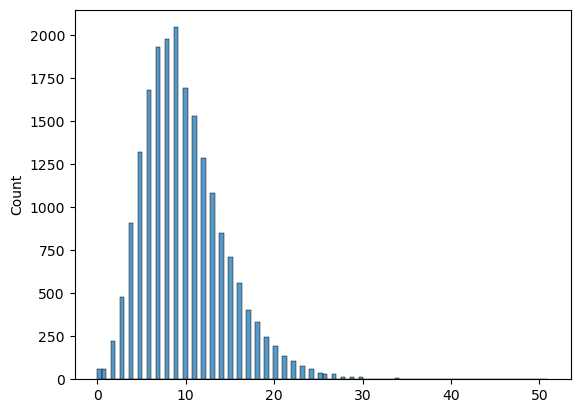

In [43]:
# plot histogram of number of ingredients counts using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(ingredients_count, bins=100)

In [49]:
import re

def recipe_contains_unknown_ingredients(ingredients_list, key_ingredients):
    # Normalize key ingredients by converting to lowercase
    key_ingredients = [key.lower() for key in key_ingredients]
    
    for ingredient in ingredients_list:
        # Normalize the ingredient (lowercase, remove extra details)
        ingredient = ingredient.lower()
        # Remove common descriptors like "chopped", "fresh", "organic" to simplify matching
        ingredient_cleaned = re.sub(r'\b(thin|chopped|fresh|organic|minced|crushed|extra virgin|dried)\b', '', ingredient).strip()
        
        # Check if any key ingredient is a full match within the cleaned ingredient
        matches = [key for key in key_ingredients if key in ingredient_cleaned]
        
        # If no match is found, this ingredient is unknown
        if not matches:
            print(f"Unknown ingredient: {ingredient}")
            return True
    
    return False


In [50]:
# Go through each recipe and print it if it contains unknown ingredients
i = 0
key_ingredients = set(item for sublist in common_ingredients.values() for item in sublist)
for recipe in dataset:
    if recipe == {}:
        continue
    if recipe_contains_unknown_ingredients(recipe["ingredients"], key_ingredients):
        i+=1
i


Unknown ingredient: 1 cup dried brown lentils
Unknown ingredient: 1 1/2 cups whipping cream
Unknown ingredient: 1 cup dry white wine
Unknown ingredient: 1 12-ounce package frozen spinach soufflé, thawed
Unknown ingredient: 2 1/2 cups (lightly packed) fresh basil leaves
Unknown ingredient: 1 1/2 pounds asparagus, trimmed, cut into 2-inch pieces
Unknown ingredient: 60 kumquats (preferably thin-skinned)
Unknown ingredient: 2 teaspoons asian sesame oil
Unknown ingredient: 6 long parsley sprigs, divided
Unknown ingredient: 1/2 cup finely chopped shallots
Unknown ingredient: 11/2 teaspoons blacan (shrimp paste)
Unknown ingredient: nonstick vegetable oil spray
Unknown ingredient: 3 tablespoons chopped fresh parsley
Unknown ingredient: 1/3 cup dijon mustard
Unknown ingredient: 2 cups chopped spinach leaves
Unknown ingredient: 1/3 cup heavy whipping cream
Unknown ingredient: 2 celery ribs, cut into 2-inch pieces
Unknown ingredient: 2 small red bell peppers, halved lengthwise, seeded, stems left

19536

In [40]:
exp_ing_file = "expected_ingredients.json"
desired_ing_file = "desired_ingredients.json"

with open(exp_ing_file, "r") as file:
    expected_ing = json.load(file)
expected_ing = set(map(str.lower, expected_ing))

with open(desired_ing_file, "r") as file:
    desired_ing = json.load(file)
desired_ing = set(map(str.lower, desired_ing))

key_ingredients = expected_ing.union(desired_ing)